*   Name: Praneetha Babburi
*   700#: 700757931
*   Video link: https://drive.google.com/file/d/1XXZEuIsGbtqVTDmsTSOCrOnw6sKfBqj1/view?usp=sharing







**1. Add one more hidden layer to autoencoder**

In [2]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
hidden_enc = Dense(128, activation='relu')(input_img)       # New hidden layer
encoded = Dense(encoding_dim, activation='relu')(hidden_enc)
# "decoded" is the lossy reconstruction of the input
hidden_dec = Dense(128, activation='relu')(encoded)          # New hidden layer
decoded = Dense(784, activation='sigmoid')(hidden_dec)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.6943 - val_loss: 0.6942
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.6941 - val_loss: 0.6939
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.6939 - val_loss: 0.6937
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.6937 - val_loss: 0.6935
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.6934 - val_loss: 0.6933


**2. Do the prediction on the test data and then visualize one of the reconstructed version of that test data. Also, visualize the same test data before reconstruction using Matplotlib**

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.6933 - val_loss: 0.6933
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.6933 - val_loss: 0.6932
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.6931 - val_loss: 0.6930
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


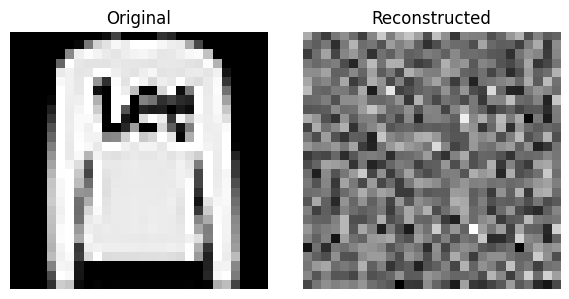

In [9]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Define autoencoder structure
encoding_dim = 32
input_img = Input(shape=(784,))
hidden_enc = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(hidden_enc)
hidden_dec = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(hidden_dec)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load data
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Predict on test data
decoded_imgs = autoencoder.predict(x_test)

# Visualize original and reconstructed image
n = 1  # number of example to display
plt.figure(figsize=(6, 3))

# Original
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[n].reshape(28, 28), cmap='gray')
plt.title("Original")
plt.axis('off')

# Reconstructed
ax = plt.subplot(1, 2, 2)
plt.imshow(decoded_imgs[n].reshape(28, 28), cmap='gray')
plt.title("Reconstructed")
plt.axis('off')

plt.tight_layout()
plt.show()


**3. Repeat the question 2 on the denoisening autoencoder**

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.6949 - val_loss: 0.6947
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.6946 - val_loss: 0.6944
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.6944 - val_loss: 0.6942
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.6942 - val_loss: 0.6940
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.6940 - val_loss: 0.6938
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.6938 - val_loss: 0.6936
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.6935 - val_loss: 0.6934
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.6934 - val_loss: 0.6932
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.6932 - val_loss: 0.6930
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.6930 - val_loss: 0.6928
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


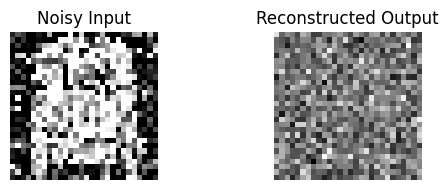

In [10]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Predict reconstructed images
reconstructed = autoencoder.predict(x_test_noisy)

# Visualize original (noisy) and reconstructed images
n = 1  # how many digits we will display
plt.figure(figsize=(6, 2))

# Original noisy image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[n].reshape(28, 28), cmap='gray')
plt.title("Noisy Input")
plt.axis('off')

# Reconstructed image
ax = plt.subplot(1, 2, 2)
plt.imshow(reconstructed[n].reshape(28, 28), cmap='gray')
plt.title("Reconstructed Output")
plt.axis('off')

plt.tight_layout()
plt.show()


**4. plot loss and accuracy using the history object**

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7130 - loss: 0.8540 - val_accuracy: 0.8339 - val_loss: 0.4763
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8445 - loss: 0.4453 - val_accuracy: 0.8294 - val_loss: 0.4670
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8581 - loss: 0.3968 - val_accuracy: 0.8531 - val_loss: 0.4128
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8695 - loss: 0.3682 - val_accuracy: 0.8591 - val_loss: 0.4031
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8783 - loss: 0.3442 - val_accuracy: 0.8635 - val_loss: 0.3778
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8836 - loss: 0.3254 - val_accuracy: 0.8670 - val_loss: 0.3724
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8862 - loss: 0.3140 - val_accuracy: 0.8644 - val_loss: 0.3857
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8903 - loss: 0.3034 - val_accuracy: 0

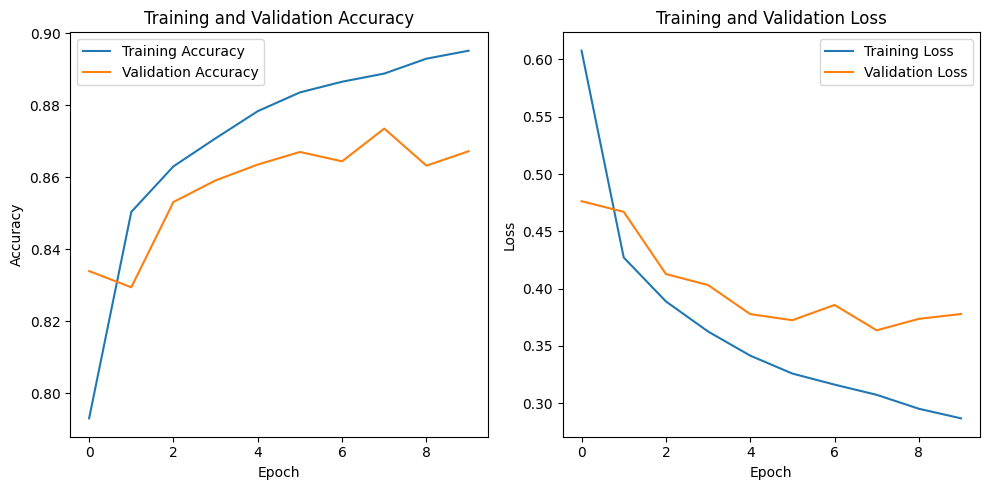

In [11]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adam

# Load and prepare the Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 784).astype('float32') / 255
x_test = x_test.reshape(-1, 784).astype('float32') / 255

# Convert labels to one-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Model architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(10, activation='softmax')(encoded)  # Classification layer

model = Model(input_img, decoded)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, y_test))

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()